# Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Montar dataset original

Primero, creamos un dataframe usando el dataset 'Datos_abiertos_matriculas_2016_1_2024_1.csv'

In [ ]:
#filePath = '/content/drive/MyDrive/Archivos para Exprésate Perú con Datos 2/Datasets Prueba/Alumnos matriculados en la Universidad Nacional de Ingeniería - [UNI]/Datos_abiertos_matriculas_2016_1_2024_1.csv'

# Sube el dataset original al Colab para correr este código
filePath = 'Datos_abiertos_matriculas_2016_1_2024_1.csv'
df_alumnosUNI = pd.read_csv(filePath)
df_alumnosUNI.loc[df_alumnosUNI.NACIMIENTO_PAIS == 'rusia', 'NACIMIENTO_PAIS'] = 'Rusia'

# En caso veas los datos de las columnas ANIO, PERIODO, ANIO_NACIMIENTO y CICLO_RELATIVO como decimales, quítale el hashtag a estas líneas de código
#df_alumnosUNI.ANIO = df_alumnosUNI.ANIO.astype(int)
#df_alumnosUNI.PERIODO = df_alumnosUNI.PERIODO.astype(int)
#df_alumnosUNI.ANIO_NACIMIENTO = df_alumnosUNI.ANIO_NACIMIENTO.astype(int)
#df_alumnosUNI.CICLO_RELATIVO = df_alumnosUNI.CICLO_RELATIVO.astype(int)
df_alumnosUNI.head()

,IDHASH,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,DOMICILIO_PROV,DOMICILIO_DIST,...,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,MODALIDAD,METODOLOGIA,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,07E35E858686718757529DDDBEC110B0B39CA2FCC810A6...,LIMA,LIMA METROPOLITANA,LURIGANCHO,2016,1,Regulares,LIMA,LIMA METROPOLITANA,LURIGANCHO,...,Peru,LIMA,LIMA METROPOLITANA,LURIGANCHO,MASCULINO,INGRESO DIRECTO,PRESENCIAL,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,INGENIERÍA INDUSTRIAL,3
1,24DAB8EC1FDFA72428AF843FFABB4901743386A9EBD0A1...,LIMA,LIMA METROPOLITANA,ATE,2016,1,Regulares,LIMA,LIMA METROPOLITANA,ATE,...,Peru,JUNÍN,SATIPO,PANGOA,MASCULINO,DOS PRIMEROS ALUMNOS,PRESENCIAL,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ECONÓMICA,2
2,0FD5293AAD1655B7FBF28920796B1C49144F4B7F3BEA24...,LIMA,LIMA METROPOLITANA,VILLA EL SALVADOR,2016,1,Regulares,LIMA,LIMA METROPOLITANA,VILLA MARIA DEL TRIUNFO,...,Peru,LIMA,LIMA METROPOLITANA,JESUS MARIA,MASCULINO,ORDINARIO,PRESENCIAL,INGENIERÍA ELÉCTRICA Y ELECTRÓNICA,INGENIERÍA ELECTRÓNICA,2
3,5B07CA8222FAB9610D2B3C0D3789CAF1103479F47ACA8E...,ÁNCASH,CARHUAZ,CARHUAZ,2016,1,Regulares,ÁNCASH,CARHUAZ,CARHUAZ,...,Peru,ÁNCASH,HUARAZ,INDEPENDENCIA,MASCULINO,INGRESO DIRECTO,PRESENCIAL,"INGENIERÍA DE PETRÓLEO, GAS NATURAL Y PETROQUÍ...",INGENIERÍA PETROQUÍMICA,2
4,FF657E45CD5AE985DCDF4E3C7B5CCA17F90056F075473C...,LIMA,LIMA METROPOLITANA,CARABAYLLO,2016,1,Regulares,AMAZONAS,NaN,NaN,...,Peru,LIMA,LIMA METROPOLITANA,SAN MARTIN DE PORRES,MASCULINO,ORDINARIO,PRESENCIAL,INGENIERÍA MECÁNICA,INGENIERÍA MECÁNICA Y ELÉCTRICA,1


Y ordenamos las filas para facilitar la visualización de la tabla.

In [ ]:
df_alumnosUNI = df_alumnosUNI.sort_values(['ANIO', 'PERIODO', 'IDHASH', 'CICLO_RELATIVO']).reset_index().drop(columns='index')
df_alumnosUNI.head()

,IDHASH,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,DOMICILIO_PROV,DOMICILIO_DIST,...,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,MODALIDAD,METODOLOGIA,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,LIMA,LIMA METROPOLITANA,SAN JUAN DE LURIGANCHO,2016,1,Regulares,LIMA,LIMA METROPOLITANA,SAN JUAN DE LURIGANCHO,...,Peru,LAMBAYEQUE,CHICLAYO,SAÑA,FEMENINO,ORDINARIO,PRESENCIAL,"INGENIERÍA DE PETRÓLEO, GAS NATURAL Y PETROQUÍ...",INGENIERÍA PETROQUÍMICA,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,LAMBAYEQUE,CHICLAYO,ETEN,2016,1,Regulares,LIMA,LIMA METROPOLITANA,CHORRILLOS,...,Peru,LIMA,LIMA METROPOLITANA,CHORRILLOS,MASCULINO,ORDINARIO,PRESENCIAL,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,INGENIERÍA DE SISTEMAS,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,LIMA,LIMA METROPOLITANA,SANTIAGO DE SURCO,2016,1,Regulares,AMAZONAS,NaN,NaN,...,Peru,LIMA,LIMA METROPOLITANA,MIRAFLORES,MASCULINO,INGRESO DIRECTO,PRESENCIAL,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ESTADÍSTICA,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,LIMA,LIMA METROPOLITANA,CARABAYLLO,2016,1,Regulares,LIMA,LIMA METROPOLITANA,CARABAYLLO,...,Peru,LIMA,LIMA METROPOLITANA,COMAS,MASCULINO,ORDINARIO,PRESENCIAL,"INGENIERÍA GEOLÓGICA, MINERA Y METALÚRGICA",INGENIERÍA DE MINAS,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,LIMA,LIMA METROPOLITANA,VILLA MARIA DEL TRIUNFO,2016,1,Regulares,LIMA,LIMA METROPOLITANA,VILLA EL SALVADOR,...,Peru,LIMA,LIMA METROPOLITANA,MIRAFLORES,MASCULINO,INGRESO DIRECTO CEPRE-UNI,PRESENCIAL,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ECONÓMICA,6


## Remover columnas

Para este análisis, se eliminarán ciertas columnas, ya que no nos aportan nada y sólo representan un mayor consumo de memoria. Queremos un archivo ligero y con lo más importante.

In [ ]:
df_alumnosUNI.columns

Index(['IDHASH', 'COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'ANIO',
       'PERIODO', 'TIPO_MATRICULA', 'DOMICILIO_DEPA', 'DOMICILIO_PROV',
       'DOMICILIO_DIST', 'ANIO_NACIMIENTO', 'NACIMIENTO_PAIS',
       'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST', 'SEXO',
       'MODALIDAD', 'METODOLOGIA', 'FACULTAD', 'ESPECIALIDAD',
       'CICLO_RELATIVO'],
      dtype='object')

De estas columnas, eliminaremos:
  - COLEGIO_DEPA
  - COLEGIO_PROV
  - COLEGIO_DIST
  - DOMICILIO_PROV
  - DOMICILIO_DIST
  - NACIMIENTO_PAIS
  - NACIMIENTO_DEPA
  - NACIMIENTO_PROV
  - NACIMIENTO_DIST

In [ ]:
df_alumnosUNI.drop(columns=['COLEGIO_DEPA', 'COLEGIO_PROV', 'COLEGIO_DIST', 'DOMICILIO_PROV', 'DOMICILIO_DIST',
                            'NACIMIENTO_PROV', 'NACIMIENTO_DEPA', 'NACIMIENTO_DIST'], inplace=True)
df_alumnosUNI.head()

,IDHASH,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,METODOLOGIA,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016,1,Regulares,LIMA,1995,Peru,FEMENINO,ORDINARIO,PRESENCIAL,"INGENIERÍA DE PETRÓLEO, GAS NATURAL Y PETROQUÍ...",INGENIERÍA PETROQUÍMICA,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016,1,Regulares,LIMA,1994,Peru,MASCULINO,ORDINARIO,PRESENCIAL,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,INGENIERÍA DE SISTEMAS,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016,1,Regulares,AMAZONAS,1997,Peru,MASCULINO,INGRESO DIRECTO,PRESENCIAL,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ESTADÍSTICA,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016,1,Regulares,LIMA,1996,Peru,MASCULINO,ORDINARIO,PRESENCIAL,"INGENIERÍA GEOLÓGICA, MINERA Y METALÚRGICA",INGENIERÍA DE MINAS,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016,1,Regulares,LIMA,1990,Peru,MASCULINO,INGRESO DIRECTO CEPRE-UNI,PRESENCIAL,"INGENIERÍA ECONÓMICA, ESTADÍSTICA Y CIENCIAS S...",INGENIERÍA ECONÓMICA,6


## Cambiar tamaños de letra

La gran mayoría de datos de texto están en full mayúsculas. Reemplazaremos todos los textos por valores con una maýuscula al comienzo de cada palabra, para que así los datos se vean mucho mejor.

In [ ]:
df_alumnosUNI.DOMICILIO_DEPA = df_alumnosUNI.DOMICILIO_DEPA.str.title()
df_alumnosUNI.SEXO = df_alumnosUNI.SEXO.str.title()
df_alumnosUNI.MODALIDAD = df_alumnosUNI.MODALIDAD.str.title()
df_alumnosUNI.METODOLOGIA = df_alumnosUNI.METODOLOGIA.str.title()
df_alumnosUNI.FACULTAD = df_alumnosUNI.FACULTAD.str.title()
df_alumnosUNI.ESPECIALIDAD = df_alumnosUNI.ESPECIALIDAD.str.title()
df_alumnosUNI.head()

,IDHASH,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,METODOLOGIA,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016,1,Regulares,Lima,1995,Peru,Femenino,Ordinario,Presencial,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016,1,Regulares,Lima,1994,Peru,Masculino,Ordinario,Presencial,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016,1,Regulares,Amazonas,1997,Peru,Masculino,Ingreso Directo,Presencial,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016,1,Regulares,Lima,1996,Peru,Masculino,Ordinario,Presencial,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016,1,Regulares,Lima,1990,Peru,Masculino,Ingreso Directo Cepre-Uni,Presencial,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


# Tratar valores nulos

Revisamos qué columnas contienen nulls y cuáles no.

In [ ]:
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   IDHASH           192389 non-null  object
 1   ANIO             192389 non-null  int64 
 2   PERIODO          192389 non-null  int64 
 3   TIPO_MATRICULA   192389 non-null  object
 4   DOMICILIO_DEPA   190898 non-null  object
 5   ANIO_NACIMIENTO  192389 non-null  int64 
 6   NACIMIENTO_PAIS  192202 non-null  object
 7   SEXO             192389 non-null  object
 8   MODALIDAD        192389 non-null  object
 9   METODOLOGIA      192389 non-null  object
 10  FACULTAD         192389 non-null  object
 11  ESPECIALIDAD     192389 non-null  object
 12  CICLO_RELATIVO   192389 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 19.1+ MB


Revisamos qué filas contienen al menos un dato null.

In [ ]:
df_alumnosUNI[df_alumnosUNI.isnull().any(axis=1)]

,IDHASH,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,METODOLOGIA,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
17,006E02166802EDA20F2D4022BCED7FF08BB451E16244D8...,2016,1,Regulares,NaN,1967,Peru,Masculino,Ordinario,Presencial,"Arquitectura, Urbanismo Y Artes",Arquitectura,3
67,01DE4CD6F612487E51EF4FF32441843F537D8DF16EBF6E...,2016,1,Regulares,NaN,1995,Peru,Masculino,Concurso Nacional Escolar,Presencial,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería Geológica,7
105,02CBFD44FD603C7ED1FD175387E892E33A7F58BDE96038...,2016,1,Cachimbos,NaN,1997,Peru,Masculino,Ordinario,Presencial,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,1
183,049F8A2329C8866F8A47B32A1577A02942740D6A485B59...,2016,1,Regulares,NaN,1996,NaN,Masculino,Ordinario,Presencial,Ingeniería Ambiental,Ingeniería Sanitaria,8
563,0F0DEBD0A0E0A07E6C3279C8FDE9D6A0CD339294C80703...,2016,1,Regulares,NaN,1999,Peru,Masculino,Ordinario,Presencial,Ingeniería Eléctrica Y Electrónica,Ingeniería Eléctrica,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191972,F6D77EB3351AC73B9A813F80429B62475078007A0B6517...,2024,1,Cachimbos,NaN,2007,Peru,Masculino,Ordinario,Presencial,Ingeniería Eléctrica Y Electrónica,Ingeniería Electrónica,1
192027,F819C0C9516BB525F710DBF076BAED18549E192181C0E2...,2024,1,Regulares,NaN,1983,Peru,Masculino,Ordinario,Presencial,Ciencias,Matemática,8
192088,F9E2CC6045EFBF1F11DA175AB7007100A69524B2BF492C...,2024,1,Regulares,NaN,2000,Peru,Masculino,Ingreso Directo Cepre-Uni,Presencial,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,1
192228,FCE4D0714F9E88201B5FC989AFDE07C7CAD4B267A6DA56...,2024,1,Cachimbos,NaN,2006,Peru,Masculino,Ingreso Escolar Nacional,Presencial,Ingeniería Civil,Ingeniería Civil,1


1491 filas!

Creamos un dataframe para experimentar cosillas del dataframe original. Sólo mostraremos las columnas que contienen al menos un null.

In [ ]:
dfTemp = df_alumnosUNI[:]
dfTemp = dfTemp.loc[:, dfTemp.isna().any()]
dfTemp.head()

,DOMICILIO_DEPA,NACIMIENTO_PAIS
0,Lima,Peru
1,Lima,Peru
2,Amazonas,Peru
3,Lima,Peru
4,Lima,Peru


Llenamos los valores nulos de DOMICILIO_DEPA por la moda en la columna.

In [ ]:
dfTemp.DOMICILIO_DEPA.mode()[0]

'Lima'

In [ ]:
dfTemp.DOMICILIO_DEPA.fillna(dfTemp.DOMICILIO_DEPA.mode()[0], inplace=True)
df_alumnosUNI.DOMICILIO_DEPA.fillna(df_alumnosUNI.DOMICILIO_DEPA.mode()[0], inplace=True)
df_alumnosUNI.info()

<ipython-input-234-3a56b728f21c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp.DOMICILIO_DEPA.fillna(dfTemp.DOMICILIO_DEPA.mode()[0], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   IDHASH           192389 non-null  object
 1   ANIO             192389 non-null  int64 
 2   PERIODO          192389 non-null  int64 
 3   TIPO_MATRICULA   192389 non-null  object
 4   DOMICILIO_DEPA   192389 non-null  object
 5   ANIO_NACIMIENTO  192389 non-null  int64 
 6   NACIMIENTO_PAIS  192202 non-null  object
 7   SEXO             192389 non-null  object
 8   MODALIDAD        192389 non-null  object
 9   METODOLOGIA      192389 non-null  object
 10  FACULTAD         192389 non-null  object
 11  ESPECIALIDAD     192389 non-null  object
 12  CICLO_RELATIVO   192389 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 19.1+ MB


Solamente falta NACIMIENTO_PAIS. Veamos qué países se encuentran en la columna.

In [ ]:
for pais in dfTemp.NACIMIENTO_PAIS.unique():
  print(pais)

print('\nN° países: ' + str(len(dfTemp.NACIMIENTO_PAIS.unique())))

Peru
Venezuela
Japon
nan
Argentina
Brasil
Colombia
RSS de Ucrania
Chile
Bolivia
Guatemala
Estados Unidos
Rusia
Nueva Zelanda
Alemania
Italia
Paraguay
Francia
Corea Republica
España
Suiza

N° países: 21


Hay 21 países en nuestra columna, pero uno de ellos se llama 'nan', es decir, valores nulos. De igual manera, reemplazamos los nulos por el valor de la moda en la columna.

In [ ]:
dfTemp.NACIMIENTO_PAIS.mode()[0]

'Peru'

In [ ]:
dfTemp.NACIMIENTO_PAIS.fillna(dfTemp.NACIMIENTO_PAIS.mode()[0], inplace=True)
df_alumnosUNI.NACIMIENTO_PAIS.fillna(df_alumnosUNI.NACIMIENTO_PAIS.mode()[0], inplace=True)
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   IDHASH           192389 non-null  object
 1   ANIO             192389 non-null  int64 
 2   PERIODO          192389 non-null  int64 
 3   TIPO_MATRICULA   192389 non-null  object
 4   DOMICILIO_DEPA   192389 non-null  object
 5   ANIO_NACIMIENTO  192389 non-null  int64 
 6   NACIMIENTO_PAIS  192389 non-null  object
 7   SEXO             192389 non-null  object
 8   MODALIDAD        192389 non-null  object
 9   METODOLOGIA      192389 non-null  object
 10  FACULTAD         192389 non-null  object
 11  ESPECIALIDAD     192389 non-null  object
 12  CICLO_RELATIVO   192389 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 19.1+ MB


Ya no tenemos valores nulos! Por último, eliminemos nuestro dataframe temporal. Ya cumplió su propósito.

In [ ]:
del dfTemp

# Tratar valores no-nulos

In [ ]:
def barplots_ylabels(ax, exw, fs):
    barList = []
    [barList.append(i.get_width().astype(int)) for i in ax.patches]
    barList = list(filter(lambda x: x!=0, barList))
    barList.sort(reverse=True)

    for bar in ax.patches:
        value, width, height = round(bar.get_width()), round(bar.get_width()) + exw, bar.get_y() + bar.get_height() / 2
        if value != 0: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='black')

Primero, veamos el total de estudiantes. Podemos saber esto a partir de los códigos de cada alumno, pero sólo contando los valores únicos.

In [ ]:
print('N° estudiantes:', pd.DataFrame((df_alumnosUNI.IDHASH.unique())).count()[0])

N° estudiantes: 26920


Y ya hemos visto que el dataframe ya no contiene nulos.

In [ ]:
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   IDHASH           192389 non-null  object
 1   ANIO             192389 non-null  int64 
 2   PERIODO          192389 non-null  int64 
 3   TIPO_MATRICULA   192389 non-null  object
 4   DOMICILIO_DEPA   192389 non-null  object
 5   ANIO_NACIMIENTO  192389 non-null  int64 
 6   NACIMIENTO_PAIS  192389 non-null  object
 7   SEXO             192389 non-null  object
 8   MODALIDAD        192389 non-null  object
 9   METODOLOGIA      192389 non-null  object
 10  FACULTAD         192389 non-null  object
 11  ESPECIALIDAD     192389 non-null  object
 12  CICLO_RELATIVO   192389 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 19.1+ MB


Sin embargo, ¿realmente están bien los datos ahora?
Averigüemoslo

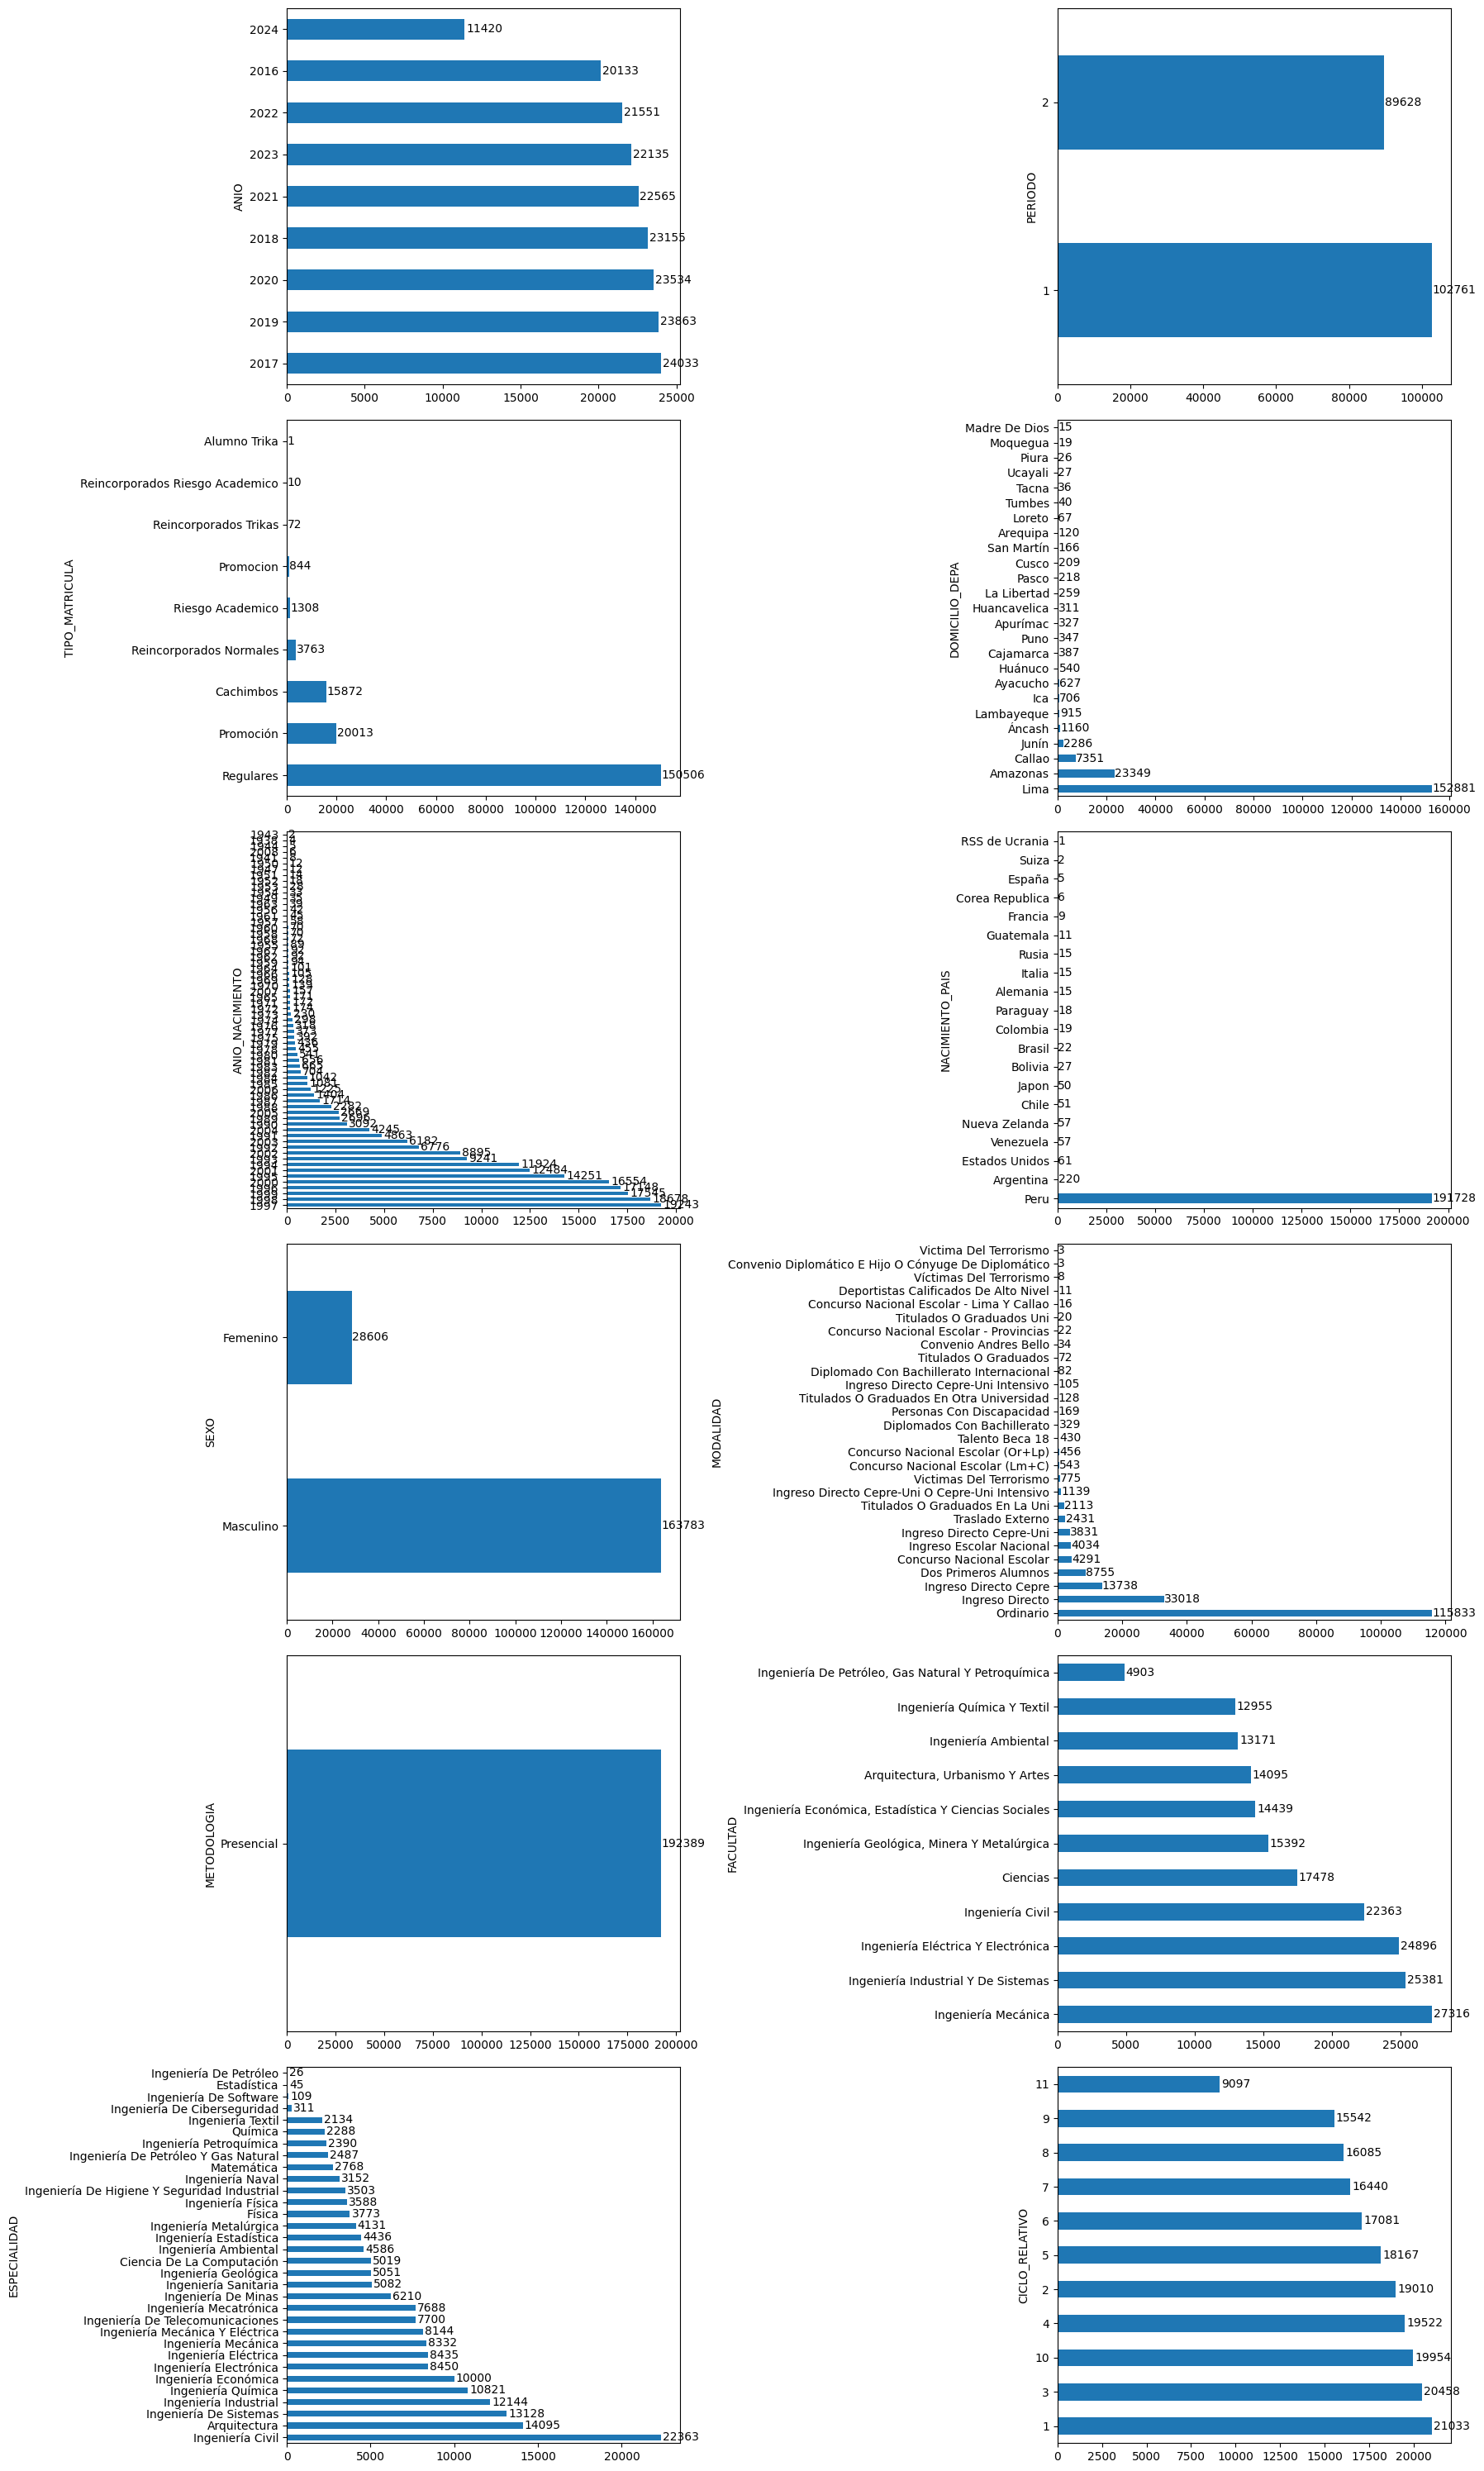

In [ ]:
fig = plt.figure(figsize=(18, 30))
gs = gridspec.GridSpec(ncols=2, nrows=6, figure=fig)

r = c = 0

for col in df_alumnosUNI.columns[1:]: # from columns[1] to columns[12]
  if c == 2:
    c = 0
    r += 1

  ax = fig.add_subplot(gs[r,c])
  df_alumnosUNI[col].value_counts().plot(kind='barh', ax=ax)
  barplots_ylabels(ax, 100, 10)
  c += 1

fig.tight_layout()
plt.show()

Fantástico, se ve muy bien... salvo las categorías de unas columnas. La primera es METODOLOGIA, ya que sólo contiene un valor: PRESENCIAL.

Como todos los alumnos matriculados estudian de manera presencial, no nos sirve esta columna, así que la eliminamos.

In [ ]:
df_alumnosUNI.drop(columns='METODOLOGIA', inplace=True)
df_alumnosUNI.head()

,IDHASH,ANIO,PERIODO,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016,1,Regulares,Lima,1995,Peru,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016,1,Regulares,Lima,1994,Peru,Masculino,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016,1,Regulares,Amazonas,1997,Peru,Masculino,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016,1,Regulares,Lima,1996,Peru,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016,1,Regulares,Lima,1990,Peru,Masculino,Ingreso Directo Cepre-Uni,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


Sin embargo, esta no es la única columna a la que tenemos que editar.

## Corregir MODALIDAD

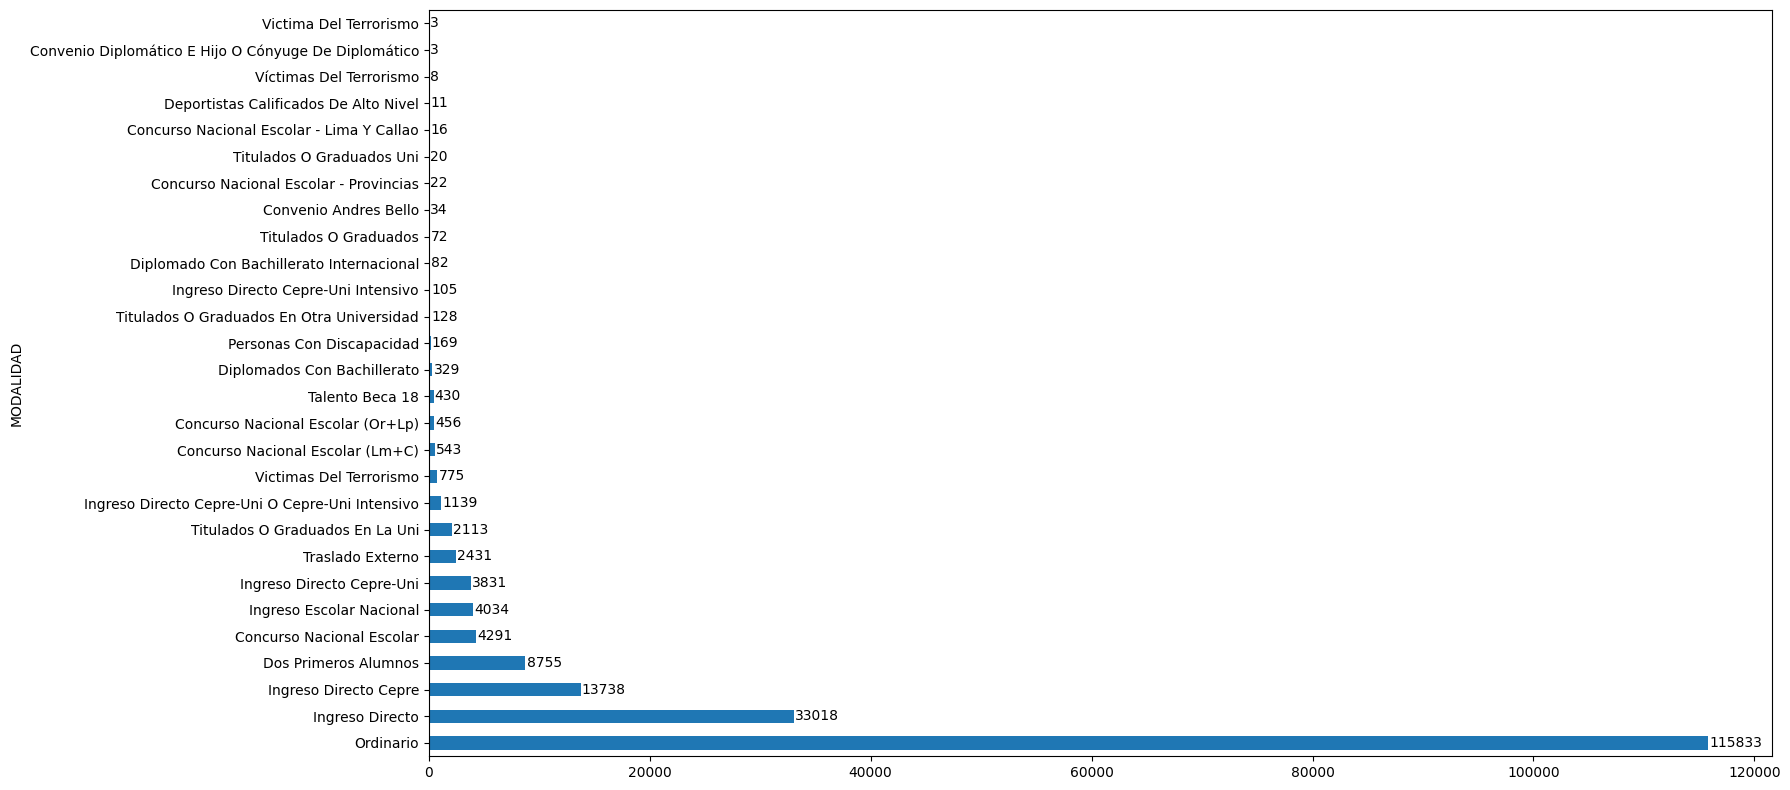

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot()
nombre = 'MODALIDAD'
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Si se fijan bien, hay varias categorías que se repiten entre sí. La primera que se puede ver a simple vista es:
- VICTIMAS DEL TERRORISMO, VÍCTIMAS DEL TERRORISMO, VICTIMA DEL TERRORISMO.

Reemplazemos los nombres por un único nombre: VÍCTIMAS DEL TERRORISMO.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Ingreso Directo Cepre-Uni',
       'Concurso Nacional Escolar', 'Dos Primeros Alumnos',
       'Titulados O Graduados En La Uni', 'Ingreso Directo Cepre',
       'Concurso Nacional Escolar (Lm+C)',
       'Concurso Nacional Escolar (Or+Lp)', 'Victimas Del Terrorismo',
       'Traslado Externo', 'Diplomado Con Bachillerato Internacional',
       'Diplomados Con Bachillerato',
       'Concurso Nacional Escolar - Lima Y Callao',
       'Titulados O Graduados En Otra Universidad',
       'Concurso Nacional Escolar - Provincias',
       'Personas Con Discapacidad', 'Ingreso Escolar Nacional',
       'Deportistas Calificados De Alto Nivel', 'Titulados O Graduados',
       'Convenio Andres Bello', 'Talento Beca 18',
       'Convenio Diplomático E Hijo O Cónyuge De Diplomático',
       'Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo',
       'Ingreso Directo Cepre-Uni Intensivo', 'Titulados O Graduados Uni',
       'Victima Del Terrorismo', 'Víctimas De

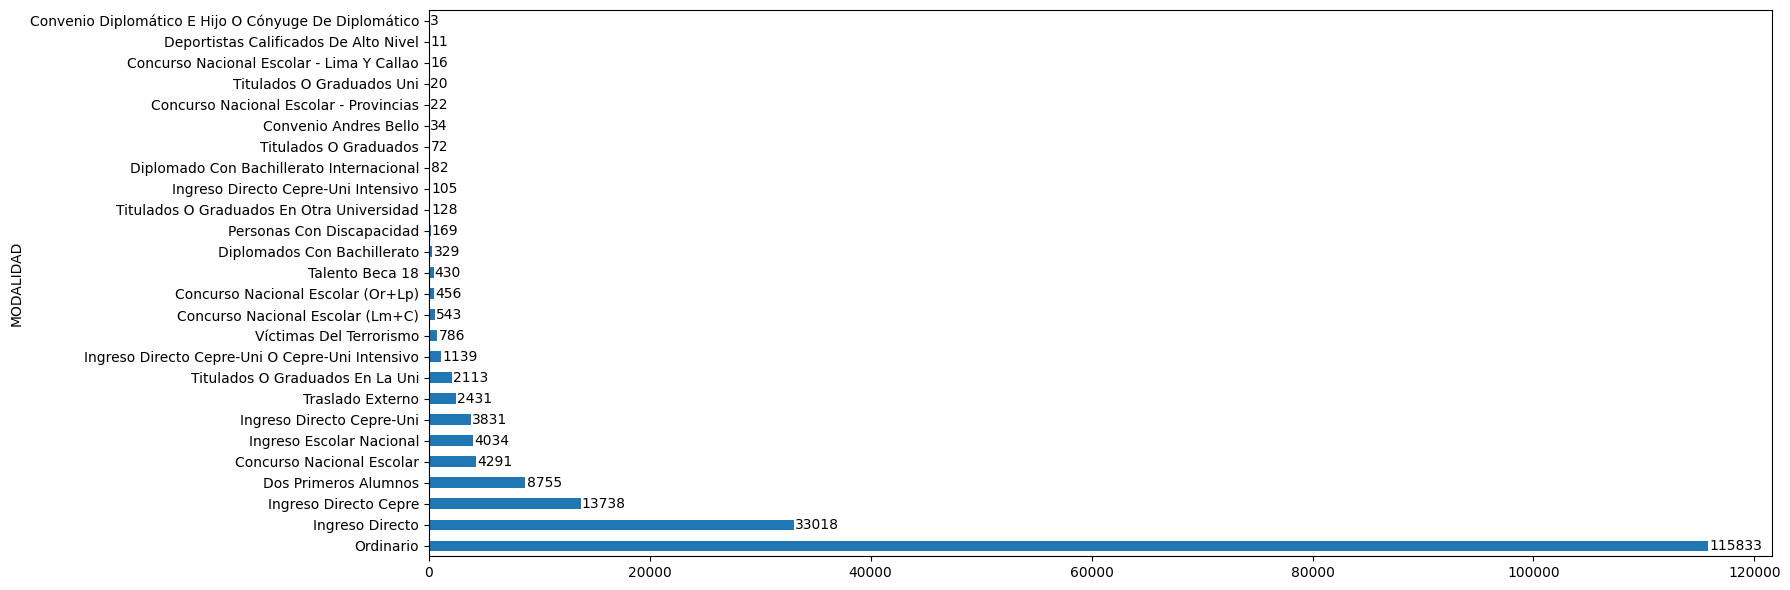

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Victimas Del Terrorismo') | (df_alumnosUNI.MODALIDAD=='Victima Del Terrorismo'), 'MODALIDAD'] = 'Víctimas Del Terrorismo'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el segundo que se ve a simple vista es:
- INGRESO DIRECTO CEPRE-UNI INTENSIVO, INGRESO DIRECTO CEPRE-UNI O CEPRE-UNI INTENSIVO, INGRESO DIRECTO CEPRE-UNI, INGRESO DIRECTO CEPRE, INGRESO DIRECTO.

Reemplazemos estos a continuación, por INGRESO DIRECTO.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Ingreso Directo Cepre-Uni',
       'Concurso Nacional Escolar', 'Dos Primeros Alumnos',
       'Titulados O Graduados En La Uni', 'Ingreso Directo Cepre',
       'Concurso Nacional Escolar (Lm+C)',
       'Concurso Nacional Escolar (Or+Lp)', 'Víctimas Del Terrorismo',
       'Traslado Externo', 'Diplomado Con Bachillerato Internacional',
       'Diplomados Con Bachillerato',
       'Concurso Nacional Escolar - Lima Y Callao',
       'Titulados O Graduados En Otra Universidad',
       'Concurso Nacional Escolar - Provincias',
       'Personas Con Discapacidad', 'Ingreso Escolar Nacional',
       'Deportistas Calificados De Alto Nivel', 'Titulados O Graduados',
       'Convenio Andres Bello', 'Talento Beca 18',
       'Convenio Diplomático E Hijo O Cónyuge De Diplomático',
       'Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo',
       'Ingreso Directo Cepre-Uni Intensivo', 'Titulados O Graduados Uni'],
      dtype=object)

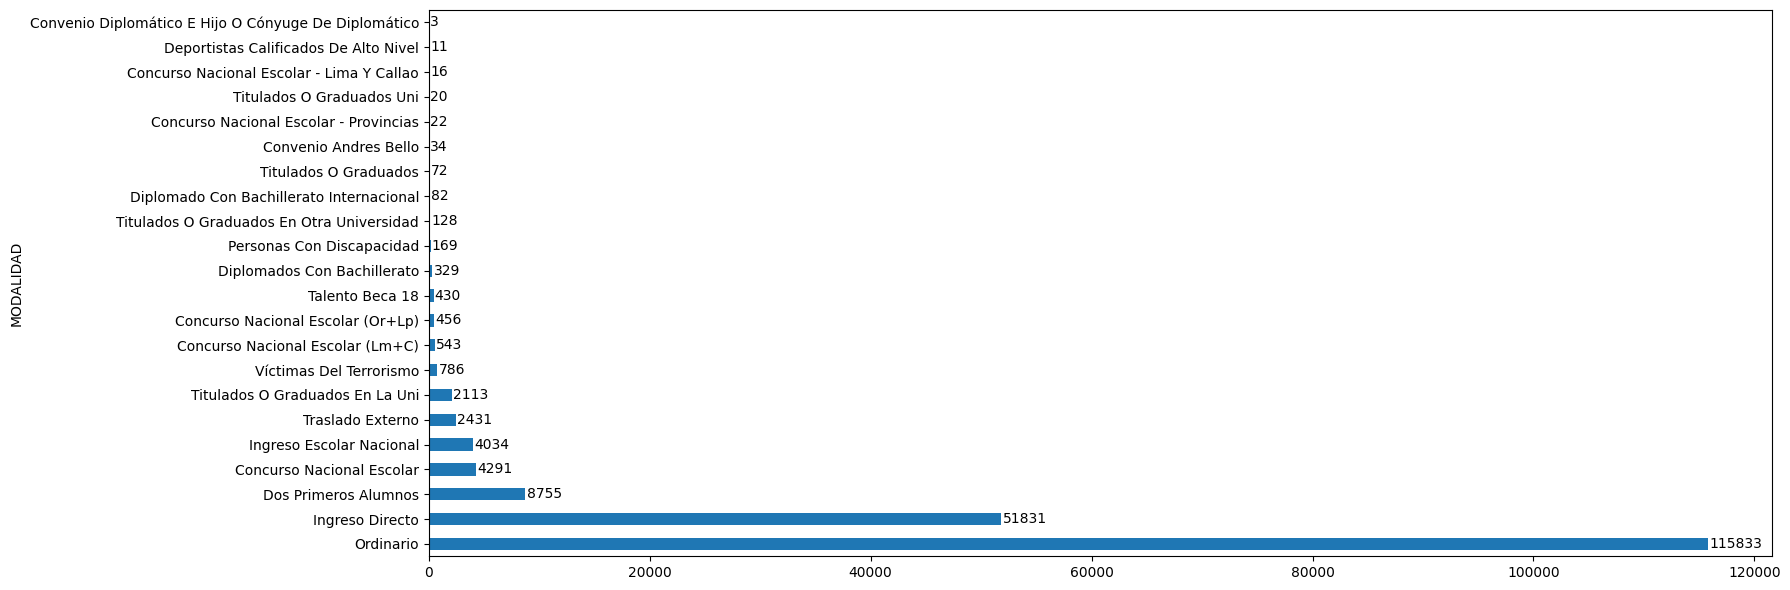

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni') | (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni O Cepre-Uni Intensivo') |
                  (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre') | (df_alumnosUNI.MODALIDAD=='Ingreso Directo Cepre-Uni Intensivo'), 'MODALIDAD'] = 'Ingreso Directo'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el tercero que se ve a simple vista es:
- TITULADOS O GRADUADOS UNI, TITULADOS O GRADUADOS, TITULADOS O GRADUADOS EN OTRA UNIVERSIDAD, TITULADOS O GRADUADOS EN LA UNI.

Reemplazamos por TITULADOS O GRADUADOS.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Concurso Nacional Escolar',
       'Dos Primeros Alumnos', 'Titulados O Graduados En La Uni',
       'Concurso Nacional Escolar (Lm+C)',
       'Concurso Nacional Escolar (Or+Lp)', 'Víctimas Del Terrorismo',
       'Traslado Externo', 'Diplomado Con Bachillerato Internacional',
       'Diplomados Con Bachillerato',
       'Concurso Nacional Escolar - Lima Y Callao',
       'Titulados O Graduados En Otra Universidad',
       'Concurso Nacional Escolar - Provincias',
       'Personas Con Discapacidad', 'Ingreso Escolar Nacional',
       'Deportistas Calificados De Alto Nivel', 'Titulados O Graduados',
       'Convenio Andres Bello', 'Talento Beca 18',
       'Convenio Diplomático E Hijo O Cónyuge De Diplomático',
       'Titulados O Graduados Uni'], dtype=object)

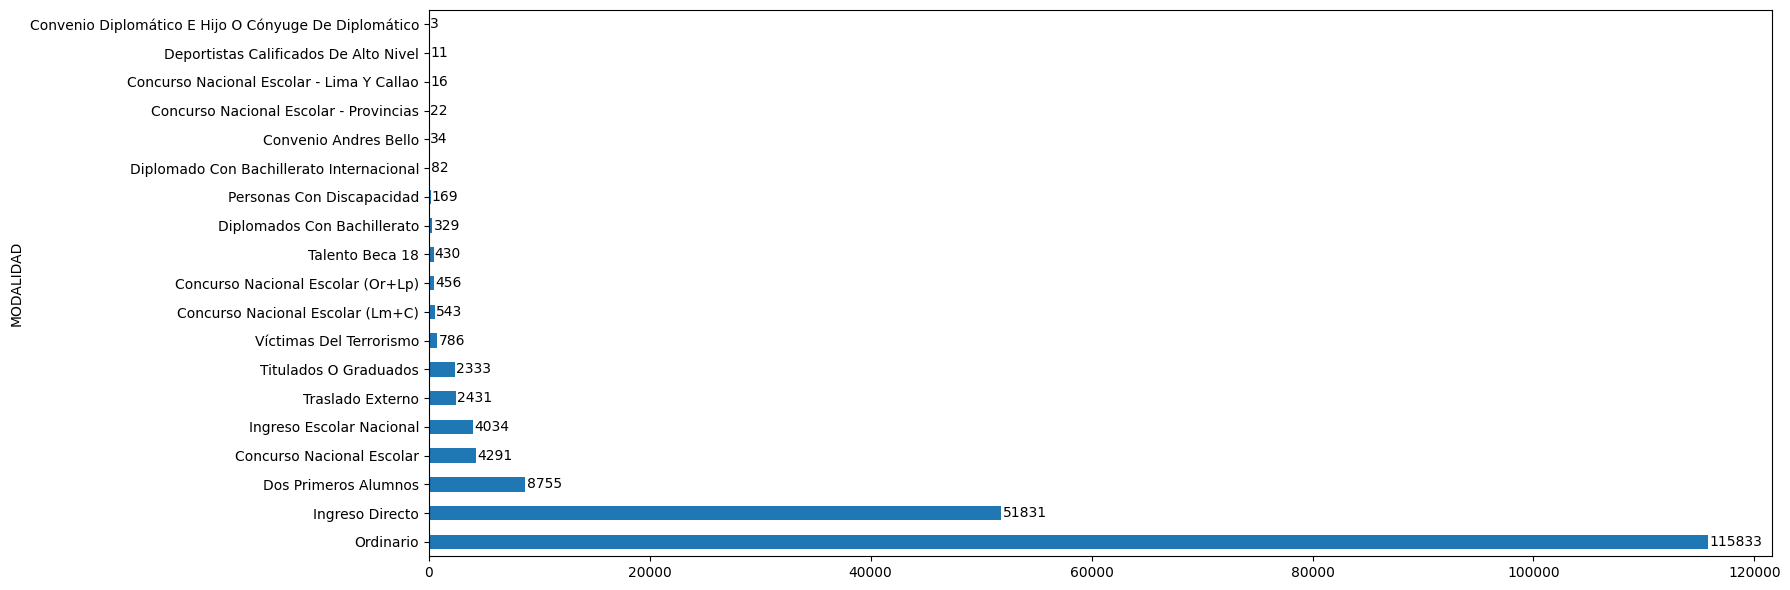

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Titulados O Graduados En La Uni') | (df_alumnosUNI.MODALIDAD=='Titulados O Graduados En Otra Universidad') |
                  (df_alumnosUNI.MODALIDAD=='Titulados O Graduados Uni'), 'MODALIDAD'] = 'Titulados O Graduados'
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el cuarto que se puede ver es:
- CONCURSO NACIONAL ESCOLAR - LIMA Y CALLAO, CONCURSO NACIONAL ESCOLAR - PROVINCIAS, CONCURSO NACIONAL ESCOLAR (OR+LP), CONCURSO NACIONAL ESCOLAR (LM+C), CONCURSO NACIONAL ESCOLAR.

Reemplazamos los nombres por CONCURSO NACIONAL ESCOLAR.

In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Concurso Nacional Escolar',
       'Dos Primeros Alumnos', 'Titulados O Graduados',
       'Concurso Nacional Escolar (Lm+C)',
       'Concurso Nacional Escolar (Or+Lp)', 'Víctimas Del Terrorismo',
       'Traslado Externo', 'Diplomado Con Bachillerato Internacional',
       'Diplomados Con Bachillerato',
       'Concurso Nacional Escolar - Lima Y Callao',
       'Concurso Nacional Escolar - Provincias',
       'Personas Con Discapacidad', 'Ingreso Escolar Nacional',
       'Deportistas Calificados De Alto Nivel', 'Convenio Andres Bello',
       'Talento Beca 18',
       'Convenio Diplomático E Hijo O Cónyuge De Diplomático'],
      dtype=object)

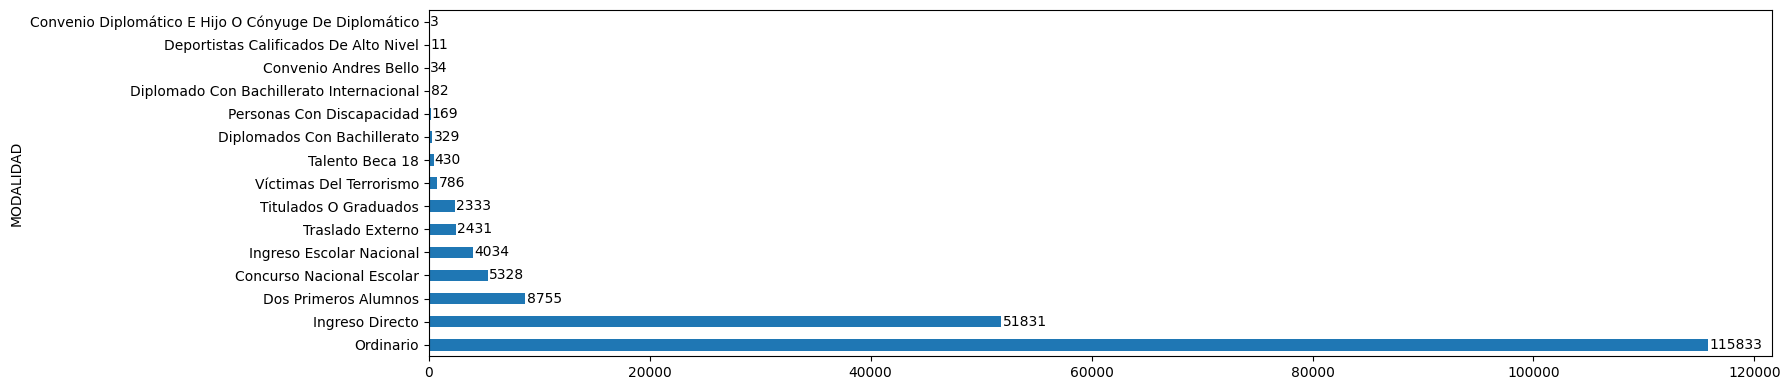

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar (Or+Lp)') | (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar - Provincias') |
                  (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar - Lima Y Callao') |
                  (df_alumnosUNI.MODALIDAD=='Concurso Nacional Escolar (Lm+C)'), 'MODALIDAD'] = 'Concurso Nacional Escolar'
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Ahora, el cuarto y quinto que se puede ver es:
- CONVENIO DIPLOMÁTICO E HIJO CON CÓNYUGE DE DIPLOMÁTICO, CONVENIO ANDRES BELLO.
- DIPLOMADO CON BACHILLERATO INTERNACIONAL, DIPLOMADO CON BACHILLERATO.

1. Ya que el Convenio Andres Bello es un Convenio Diplomático, reemplazaremos este nombre por el otro.
2. Remplazamos el primer nombre de Diplomado por DIPLOMADO CON BACHILLERATO.


In [ ]:
df_alumnosUNI.MODALIDAD.unique()

array(['Ordinario', 'Ingreso Directo', 'Concurso Nacional Escolar',
       'Dos Primeros Alumnos', 'Titulados O Graduados',
       'Víctimas Del Terrorismo', 'Traslado Externo',
       'Diplomado Con Bachillerato Internacional',
       'Diplomados Con Bachillerato', 'Personas Con Discapacidad',
       'Ingreso Escolar Nacional',
       'Deportistas Calificados De Alto Nivel', 'Convenio Andres Bello',
       'Talento Beca 18',
       'Convenio Diplomático E Hijo O Cónyuge De Diplomático'],
      dtype=object)

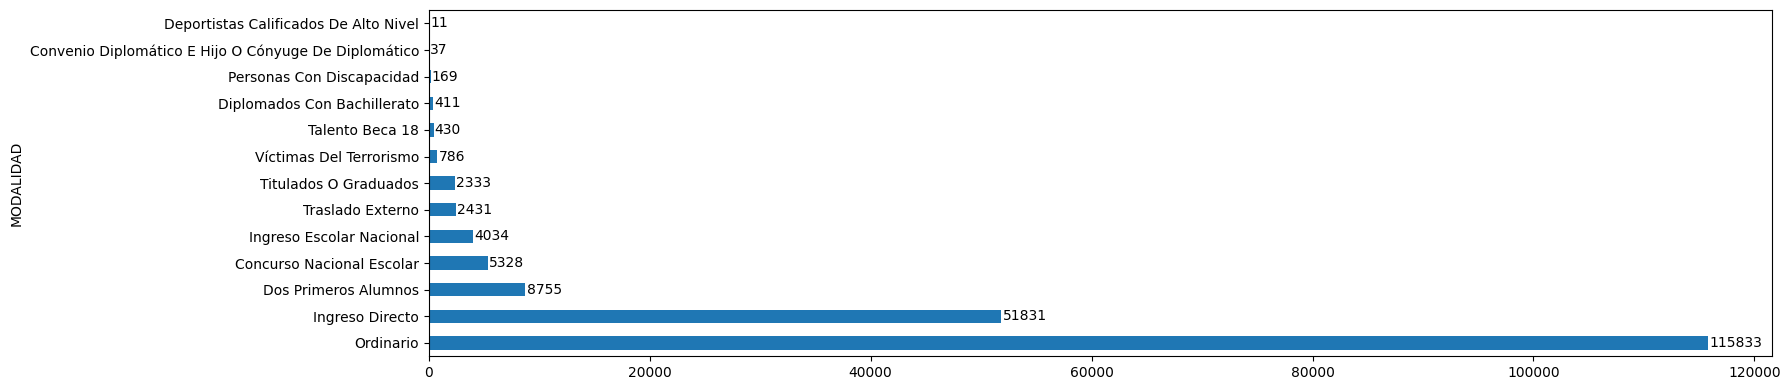

In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Convenio Andres Bello', 'MODALIDAD'] = 'Convenio Diplomático E Hijo O Cónyuge De Diplomático'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Diplomado Con Bachillerato Internacional', 'MODALIDAD'] = 'Diplomados Con Bachillerato'
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

## Corregir TIPO_MATRICULA

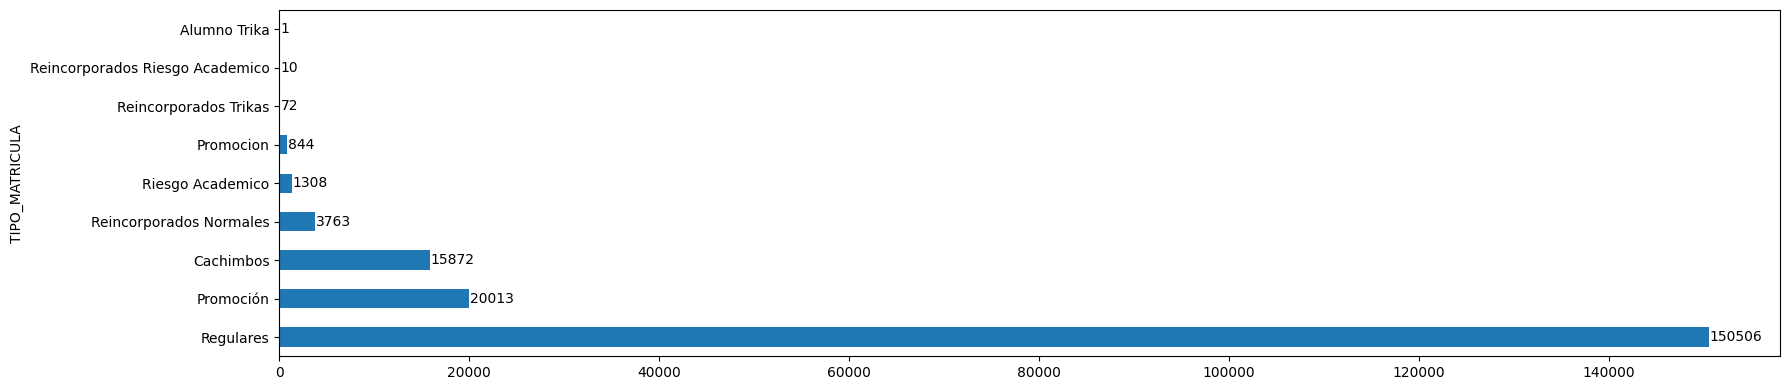

In [ ]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()
nombre = 'TIPO_MATRICULA'
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

El primero es:
- Promocion, Promoción.

Reemplazemos por Promoción.

In [ ]:
df_alumnosUNI.TIPO_MATRICULA.unique()

array(['Regulares', 'Cachimbos', 'Promoción', 'Reincorporados Normales',
       'Promocion', 'Riesgo Academico', 'Reincorporados Trikas',
       'Reincorporados Riesgo Academico', 'Alumno Trika'], dtype=object)

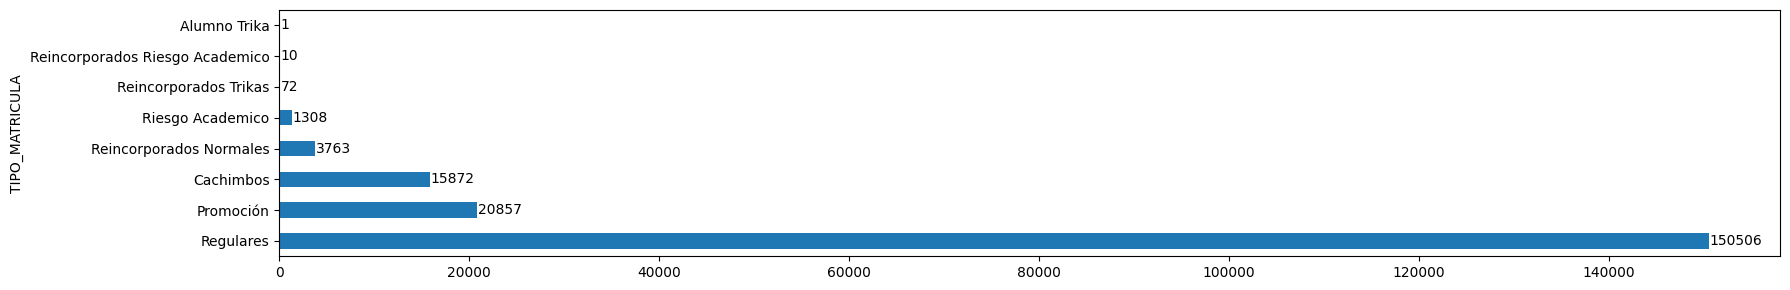

In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.TIPO_MATRICULA=='Promocion', 'TIPO_MATRICULA'] = 'Promoción'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Por mientras, juntemos los nombres de los reincorporados.

In [ ]:
df_alumnosUNI.TIPO_MATRICULA.unique()

array(['Regulares', 'Cachimbos', 'Promoción', 'Reincorporados Normales',
       'Riesgo Academico', 'Reincorporados Trikas',
       'Reincorporados Riesgo Academico', 'Alumno Trika'], dtype=object)

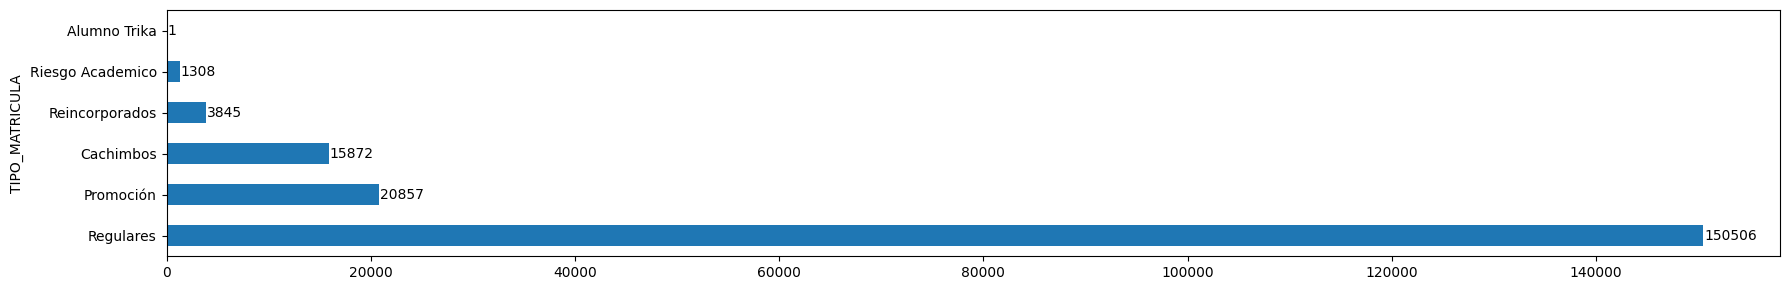

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.TIPO_MATRICULA=='Reincorporados Normales') | (df_alumnosUNI.TIPO_MATRICULA=='Reincorporados Trikas') |
                  (df_alumnosUNI.TIPO_MATRICULA=='Reincorporados Riesgo Academico'), 'TIPO_MATRICULA'] = 'Reincorporados'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

Y ya que el único Trika se considera un alumno bajo Riesgo Académico, reemplazamos ambos valores (ya que el que está allí no tiene tilde) por el correcto.

In [ ]:
df_alumnosUNI.TIPO_MATRICULA.unique()

array(['Regulares', 'Cachimbos', 'Promoción', 'Reincorporados',
       'Riesgo Academico', 'Alumno Trika'], dtype=object)

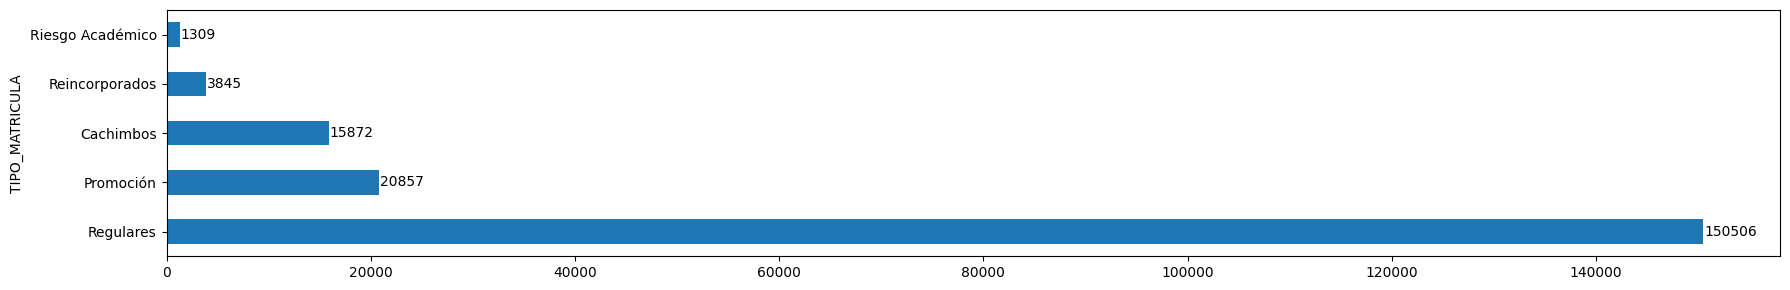

In [ ]:
df_alumnosUNI.loc[(df_alumnosUNI.TIPO_MATRICULA=='Alumno Trika') | (df_alumnosUNI.TIPO_MATRICULA=='Riesgo Academico'), 'TIPO_MATRICULA'] = 'Riesgo Académico'
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot()
df_alumnosUNI[nombre].value_counts().plot(kind='barh', ax=ax)
barplots_ylabels(ax, 100, 10)
fig.tight_layout()
plt.show()

## Modificar Semestre de las matrículas

Ya que tenemos los años y periodos de cada matrícula, pero podemos combinar ambos para crear lo que es el semestre, cuyo formato es el siguiente: Año-Periodo.

Ejemplo: 2020-2

Creamos la nueva columna y reemplazamos ANIO y PERIODO por esta nueva columna.

In [ ]:
df_alumnosUNI['SEMESTRE'] = df_alumnosUNI['ANIO'].astype(str) + '-' + df_alumnosUNI['PERIODO'].astype(str)
columnas = df_alumnosUNI.columns.to_list()
df_alumnosUNI = df_alumnosUNI[columnas[:1] + columnas[-1:] + columnas[3:-1]]
del columnas
df_alumnosUNI.head()

,IDHASH,SEMESTRE,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Peru,Femenino,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Peru,Masculino,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Peru,Masculino,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Peru,Masculino,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Peru,Masculino,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


## Modificar Sexo de los estudiantes

En realidad, vamos a sólo dejar las primeras letras de la columna SEXO

In [ ]:
df_alumnosUNI.SEXO = df_alumnosUNI.SEXO.str[0]
df_alumnosUNI.SEXO.unique()

array(['F', 'M'], dtype=object)

## Cambiar nombres de columnas

Cambiamos los nombres de las columnas para tener la información mejor agrupada. Ya estando en Power BI, podemos cambiar los nombres a nuestro antojo. Pasamos de esto:

In [ ]:
df_alumnosUNI.head()

,IDHASH,SEMESTRE,TIPO_MATRICULA,DOMICILIO_DEPA,ANIO_NACIMIENTO,NACIMIENTO_PAIS,SEXO,MODALIDAD,FACULTAD,ESPECIALIDAD,CICLO_RELATIVO
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Peru,F,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Peru,M,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Peru,M,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


A esto:

In [ ]:
df_alumnosUNI.columns = ['IDHASH', 'SEMEST', 'MATRICULA_T', 'DEPA_HOME', 'NAC_Y', 'NAC_P', 'SEX', 'MODALIDAD', 'FACULTAD', 'ESPECIALIDAD', 'C_R']
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,NAC_P,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Peru,F,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Peru,M,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Peru,M,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


## Corregir valores en CICLO_R

Se ha visto estudiantes que, ordenando por el semestre, sus ciclos relativos no se ajustan a un orden ascendente correcto.

De acuerdo a un documento de Resolución Rectoral de la UNI, en el 2017, indica lo siguiente en su glosario de términos:

*CICLO RELATIVO: Aquel ciclo que le corresponde al estudiante en función al número de créditos aprobados de acuerdo a su plan de estudios.*


Link al documento:
https://fc.uni.edu.pe/wp-content/uploads/2021/06/RR-0116-2017.pdf



Primero, ordenamos las filas por IDHASH, ESPECIALIDAD y SEMEST, pues este orden nos será favorable para realizar la corrección.

In [ ]:
df_alumnosUNI = df_alumnosUNI.sort_values(['IDHASH', 'ESPECIALIDAD', 'SEMEST']).reset_index().drop(columns='index')
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,NAC_P,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0002DF41C79D5E34153DB578014A6EADFF766488667DC3...,2024-1,Cachimbos,Lima,2006,Peru,M,Ordinario,Ingeniería Ambiental,Ingeniería Ambiental,1
1,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2019-2,Cachimbos,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,1
2,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2020-1,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,3
3,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2020-2,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,4
4,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2021-1,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,5


Después, creamos otro dataframe, con las columnas IDHASH, ESPECIALIDAD y C_R, donde corregiremos aquellos valores que son menores a los valores previos en la columna.

*Anteriormente, se realizó una función para corregir los ciclos, que demoraba varios minutos en finalizar su ejecución. Pero gracias al método cummax(), se ha reducido el tiempo de espera ¡a menos de 5 segundos!*

In [ ]:
# Aplicar cummax para ajustar los ciclos relativos
dfTemp = df_alumnosUNI[['IDHASH', 'ESPECIALIDAD', 'C_R']]
dfTemp['C_R'] = df_alumnosUNI.groupby(['IDHASH', 'ESPECIALIDAD'])['C_R'].cummax()

dfTemp.head()

<ipython-input-267-0f42c4ac2ed1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['C_R'] = df_alumnosUNI.groupby(['IDHASH', 'ESPECIALIDAD'])['C_R'].cummax()


,IDHASH,ESPECIALIDAD,C_R
0,0002DF41C79D5E34153DB578014A6EADFF766488667DC3...,Ingeniería Ambiental,1
1,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,Matemática,1
2,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,Matemática,3
3,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,Matemática,4
4,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,Matemática,5


Para revisar si realmente hubo correción en los datos de C_R, comparemos los datos de un estudiante que se matriculó en 3 carreras (especialidades), y que poseía datos erróneos.

In [ ]:
df_alumnosUNI[
    df_alumnosUNI.IDHASH == "843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12DE70022AC5A4D423F368A6BEE8F7652425703F3CE6110600DB333B833010D588E333CEF8F00D4BD568"
    ][['IDHASH', 'SEMEST', 'ESPECIALIDAD', 'C_R']]

,IDHASH,SEMEST,ESPECIALIDAD,C_R
99172,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2017-1,Ingeniería De Software,1
99173,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2017-2,Ingeniería De Software,2
99174,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2018-1,Ingeniería De Software,3
99175,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2020-2,Ingeniería Estadística,4
99176,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2021-1,Ingeniería Estadística,5
99177,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2021-2,Ingeniería Estadística,6
99178,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2022-1,Ingeniería Estadística,7
99179,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2022-2,Ingeniería Estadística,8
99180,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2023-1,Ingeniería Estadística,10
99181,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,2023-2,Ingeniería Estadística,11


Las filas están ordenadas por el IDHASH, la especialidad, y el semestre de la matrícula. Dado que los ciclos relativos dependen de cuántos créditos (cursos) hayan aprobado los estudiantes, es posible avanzar más de 1 ciclo en un semestre.

Por ejemplo, en el caso de Ingeniería Estadística, el estudiante podría haber llevado los últimos cursos de octavo y noveno ciclo que le faltaban a la vez, pasando así de 8 a 10 en su matrícula del siguiente ciclo.

Pero si nos fijamos en las matrículas con la especialidad de Ingeniería Mecánica, veremos que, avanzando por semestre, su ciclo relativo en la matrícula pasa de 5 a 1. Eso sí es un error, y para corregirlo, tenemos nuestro dataframe temporal construido:

In [ ]:
dfTemp[
    dfTemp.IDHASH == "843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12DE70022AC5A4D423F368A6BEE8F7652425703F3CE6110600DB333B833010D588E333CEF8F00D4BD568"
    ][['IDHASH', 'ESPECIALIDAD', 'C_R']]

,IDHASH,ESPECIALIDAD,C_R
99172,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería De Software,1
99173,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería De Software,2
99174,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería De Software,3
99175,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,4
99176,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,5
99177,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,6
99178,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,7
99179,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,8
99180,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,10
99181,843411EB4FC5FBB623FE4733126BD08A1D0D0695BBFF12...,Ingeniería Estadística,11


Vemos aquí que el dato erróneo fue corregido. Pero ¿por qué cambiar el orden de las filas anteriormente?

Cuando se trató de realizar la correción en el dataframe temporal, agrupando por IDHASH, SEMEST y ESPECIALIDAD, los datos no fueron corregidos. Además, la inversión de tiempo era demasiada.

Cuando se retiró la columna SEMEST de la agrupación, la correción fue exitosa (como se ve en el dataframe de arriba). Sin embargo, el orden de las filas era secuencial, es decir, primero por IDHASH y luego por ESPECIALIDAD.

Para evitar inconvenientes, se decidió cambiar el orden de nuestro dataframe principal para transferir los datos corregidos. Y eso es lo que haremos a continuación.

In [ ]:
df_alumnosUNI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192389 entries, 0 to 192388
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   IDHASH        192389 non-null  object
 1   SEMEST        192389 non-null  object
 2   MATRICULA_T   192389 non-null  object
 3   DEPA_HOME     192389 non-null  object
 4   NAC_Y         192389 non-null  int64 
 5   NAC_P         192389 non-null  object
 6   SEX           192389 non-null  object
 7   MODALIDAD     192389 non-null  object
 8   FACULTAD      192389 non-null  object
 9   ESPECIALIDAD  192389 non-null  object
 10  C_R           192389 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 16.1+ MB


In [ ]:
df_alumnosUNI['C_R'] = dfTemp['C_R']
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,NAC_P,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0002DF41C79D5E34153DB578014A6EADFF766488667DC3...,2024-1,Cachimbos,Lima,2006,Peru,M,Ordinario,Ingeniería Ambiental,Ingeniería Ambiental,1
1,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2019-2,Cachimbos,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,1
2,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2020-1,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,3
3,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2020-2,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,4
4,0003F425197CD03C452E4A0EFB8ED4652F6156127C910D...,2021-1,Regulares,Callao,2002,Peru,M,Ordinario,Ciencias,Matemática,5


Y ahora, ordenaremos nuestras filas por SEMEST e IDHASH.

In [ ]:
df_alumnosUNI = df_alumnosUNI.sort_values(['SEMEST', 'IDHASH']).reset_index().drop(columns='index')
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,NAC_P,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Peru,F,Ordinario,"Ingeniería De Petróleo, Gas Natural Y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Peru,M,Ordinario,Ingeniería Industrial Y De Sistemas,Ingeniería De Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Peru,M,Ordinario,"Ingeniería Geológica, Minera Y Metalúrgica",Ingeniería De Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística Y Ciencias S...",Ingeniería Económica,6


Y por último, eliminamos dfTemp.

In [ ]:
del dfTemp

## Cambiar tamaños de letra 2

En nuestras columnas, tenemos datos con mayúsculas donde no deberían haber. Vamos a corregirlos.
1. DEPA_HOME: Reemplazar 'Madre De Dios' por 'Madre de Dios'

In [ ]:
for x in df_alumnosUNI.DEPA_HOME.unique():
  print(x)

Lima
Amazonas
Callao
Áncash
Junín
Cajamarca
Apurímac
Ayacucho
Lambayeque
Ica
La Libertad
Cusco
Huancavelica
San Martín
Loreto
Huánuco
Tacna
Arequipa
Ucayali
Puno
Pasco
Tumbes
Moquegua
Madre De Dios
Piura


In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.DEPA_HOME=='Madre De Dios', 'DEPA_HOME'] = 'Madre de Dios'
for x in df_alumnosUNI.DEPA_HOME.unique():
  print(x)

Lima
Amazonas
Callao
Áncash
Junín
Cajamarca
Apurímac
Ayacucho
Lambayeque
Ica
La Libertad
Cusco
Huancavelica
San Martín
Loreto
Huánuco
Tacna
Arequipa
Ucayali
Puno
Pasco
Tumbes
Moquegua
Madre de Dios
Piura


2. MODALIDAD:
- Cambiar 'Titulados O Graduados' por 'Titulados o Graduados'
- Cambiar 'Víctimas Del Terrorismo' por 'Víctimas del Terrorismo'
- Cambiar 'Diplomados Con Bachillerato' por 'Diplomados con Bachillerato'
- Cambiar 'Personas Con Discapacidad' por 'Personas con Discapacidad'
- Cambiar 'Deportistas Calificados De Alto Nivel' por 'Deportistas Calificados de Alto Nivel'
- Cambiar 'Convenio Diplomático E Hijo O Cónyuge De Diplomático' por 'Convenio Diplomático e Hijo o Cónyuge de Diplomático'

In [ ]:
for x in df_alumnosUNI.MODALIDAD.unique():
  print(x)

Ordinario
Ingreso Directo
Concurso Nacional Escolar
Dos Primeros Alumnos
Titulados O Graduados
Víctimas Del Terrorismo
Traslado Externo
Diplomados Con Bachillerato
Personas Con Discapacidad
Ingreso Escolar Nacional
Deportistas Calificados De Alto Nivel
Convenio Diplomático E Hijo O Cónyuge De Diplomático
Talento Beca 18


In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Titulados O Graduados', 'MODALIDAD'] = 'Titulados o Graduados'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Víctimas Del Terrorismo', 'MODALIDAD'] = 'Víctimas del Terrorismo'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Diplomados Con Bachillerato', 'MODALIDAD'] = 'Diplomados con Bachillerato'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Personas Con Discapacidad', 'MODALIDAD'] = 'Personas con Discapacidad'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Deportistas Calificados De Alto Nivel', 'MODALIDAD'] = 'Deportistas Calificados de Alto Nivel'
df_alumnosUNI.loc[df_alumnosUNI.MODALIDAD=='Convenio Diplomático E Hijo O Cónyuge De Diplomático', 'MODALIDAD'] = 'Convenio Diplomático e Hijo o Cónyuge de Diplomático'
for x in df_alumnosUNI.MODALIDAD.unique():
  print(x)

Ordinario
Ingreso Directo
Concurso Nacional Escolar
Dos Primeros Alumnos
Titulados o Graduados
Víctimas del Terrorismo
Traslado Externo
Diplomados con Bachillerato
Personas con Discapacidad
Ingreso Escolar Nacional
Deportistas Calificados de Alto Nivel
Convenio Diplomático e Hijo o Cónyuge de Diplomático
Talento Beca 18


3. FACULTAD:
- Cambiar 'Ingeniería De Petróleo, Gas Natural Y Petroquímica' por 'Ingeniería de Petróleo, Gas Natural y Petroquímica'
- Cambiar 'Ingeniería Industrial Y De Sistemas' por 'Ingeniería Industrial y de Sistemas'
- Cambiar 'Ingeniería Económica, Estadística Y Ciencias Sociales' por 'Ingeniería Económica, Estadística y Ciencias Sociales'
- Cambiar 'Ingeniería Geológica, Minera Y Metalúrgica' por 'Ingeniería Geológica, Minera y Metalúrgica'
- Cambiar 'Arquitectura, Urbanismo Y Artes' por 'Arquitectura, Urbanismo y Artes'
- Cambiar 'Ingeniería Química Y Textil' por 'Ingeniería Química y Textil'
- Cambiar 'Ingeniería Eléctrica Y Electrónica' por 'Ingeniería Eléctrica y Electrónica'

In [ ]:
for x in df_alumnosUNI.FACULTAD.unique():
  print(x)

Ingeniería De Petróleo, Gas Natural Y Petroquímica
Ingeniería Industrial Y De Sistemas
Ingeniería Económica, Estadística Y Ciencias Sociales
Ingeniería Geológica, Minera Y Metalúrgica
Ciencias
Arquitectura, Urbanismo Y Artes
Ingeniería Ambiental
Ingeniería Química Y Textil
Ingeniería Eléctrica Y Electrónica
Ingeniería Mecánica
Ingeniería Civil


In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería De Petróleo, Gas Natural Y Petroquímica', 'FACULTAD'] = 'Ingeniería de Petróleo, Gas Natural y Petroquímica'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería Industrial Y De Sistemas', 'FACULTAD'] = 'Ingeniería Industrial y de Sistemas'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería Económica, Estadística Y Ciencias Sociales', 'FACULTAD'] = 'Ingeniería Económica, Estadística y Ciencias Sociales'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería Geológica, Minera Y Metalúrgica', 'FACULTAD'] = 'Ingeniería Geológica, Minera y Metalúrgica'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Arquitectura, Urbanismo Y Artes', 'FACULTAD'] = 'Arquitectura, Urbanismo y Artes'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería Química Y Textil', 'FACULTAD'] = 'Ingeniería Química y Textil'
df_alumnosUNI.loc[df_alumnosUNI.FACULTAD=='Ingeniería Eléctrica Y Electrónica', 'FACULTAD'] = 'Ingeniería Eléctrica y Electrónica'
for x in df_alumnosUNI.FACULTAD.unique():
  print(x)

Ingeniería de Petróleo, Gas Natural y Petroquímica
Ingeniería Industrial y de Sistemas
Ingeniería Económica, Estadística y Ciencias Sociales
Ingeniería Geológica, Minera y Metalúrgica
Ciencias
Arquitectura, Urbanismo y Artes
Ingeniería Ambiental
Ingeniería Química y Textil
Ingeniería Eléctrica y Electrónica
Ingeniería Mecánica
Ingeniería Civil


4. ESPECIALIDAD:
- Cambiar 'Ingeniería De Sistemas' por 'Ingeniería de Sistemas'
- Cambiar 'Ingeniería De Minas' por 'Ingeniería de Minas'
- Cambiar 'Ciencia De La Computación' por 'Ciencia de la Computación'
- Cambiar 'Ingeniería De Petróleo Y Gas Natural' por 'Ingeniería de Petróleo y Gas Natural'
- Cambiar 'Ingeniería De Higiene Y Seguridad Industrial' por 'Ingeniería de Higiene y Seguridad Industrial'
- Cambiar 'Ingeniería Mecánica Y Eléctrica' por 'Ingeniería Mecánica y Eléctrica'
- Cambiar 'Ingeniería De Telecomunicaciones' por 'Ingeniería de Telecomunicaciones'
- Cambiar 'Ingeniería De Petróleo' por 'Ingeniería de Petróleo'
- Cambiar 'Ingeniería De Software' por 'Ingeniería de Software'
- Cambiar 'Ingeniería De Ciberseguridad' por 'Ingeniería de Ciberseguridad'

In [ ]:
for x in df_alumnosUNI.ESPECIALIDAD.unique():
  print(x)

Ingeniería Petroquímica
Ingeniería De Sistemas
Ingeniería Estadística
Ingeniería De Minas
Ingeniería Económica
Ciencia De La Computación
Ingeniería Geológica
Arquitectura
Ingeniería Ambiental
Ingeniería Metalúrgica
Ingeniería Textil
Ingeniería Química
Ingeniería De Petróleo Y Gas Natural
Ingeniería Electrónica
Ingeniería Naval
Ingeniería Mecánica
Ingeniería Física
Ingeniería Industrial
Ingeniería De Higiene Y Seguridad Industrial
Ingeniería Mecánica Y Eléctrica
Física
Ingeniería Mecatrónica
Ingeniería Sanitaria
Ingeniería Civil
Ingeniería De Telecomunicaciones
Ingeniería Eléctrica
Matemática
Química
Estadística
Ingeniería De Petróleo
Ingeniería De Software
Ingeniería De Ciberseguridad


In [ ]:
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Sistemas', 'ESPECIALIDAD'] = 'Ingeniería de Sistemas'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Minas', 'ESPECIALIDAD'] = 'Ingeniería de Minas'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ciencia De La Computación', 'ESPECIALIDAD'] = 'Ciencia de la Computación'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Petróleo Y Gas Natural', 'ESPECIALIDAD'] = 'Ingeniería de Petróleo y Gas Natural'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Higiene Y Seguridad Industrial', 'ESPECIALIDAD'] = 'Ingeniería de Higiene y Seguridad Industrial'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería Mecánica Y Eléctrica', 'ESPECIALIDAD'] = 'Ingeniería Mecánica y Eléctrica'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Telecomunicaciones', 'ESPECIALIDAD'] = 'Ingeniería de Telecomunicaciones'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Petróleo', 'ESPECIALIDAD'] = 'Ingeniería de Petróleo'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Software', 'ESPECIALIDAD'] = 'Ingeniería de Software'
df_alumnosUNI.loc[df_alumnosUNI.ESPECIALIDAD=='Ingeniería De Ciberseguridad', 'ESPECIALIDAD'] = 'Ingeniería de Ciberseguridad'
for x in df_alumnosUNI.ESPECIALIDAD.unique():
  print(x)

Ingeniería Petroquímica
Ingeniería de Sistemas
Ingeniería Estadística
Ingeniería de Minas
Ingeniería Económica
Ciencia de la Computación
Ingeniería Geológica
Arquitectura
Ingeniería Ambiental
Ingeniería Metalúrgica
Ingeniería Textil
Ingeniería Química
Ingeniería de Petróleo y Gas Natural
Ingeniería Electrónica
Ingeniería Naval
Ingeniería Mecánica
Ingeniería Física
Ingeniería Industrial
Ingeniería de Higiene y Seguridad Industrial
Ingeniería Mecánica y Eléctrica
Física
Ingeniería Mecatrónica
Ingeniería Sanitaria
Ingeniería Civil
Ingeniería de Telecomunicaciones
Ingeniería Eléctrica
Matemática
Química
Estadística
Ingeniería de Petróleo
Ingeniería de Software
Ingeniería de Ciberseguridad


# Añadir información al dataset arreglado

## Dataset extra 1 (en Python): dfID

Primero, ya que este dataframe guarda los datos de las matrículas, ordenaremos las filas por semestre y por el IDHASH

In [ ]:
df_alumnosUNI = df_alumnosUNI.sort_values(['SEMEST', 'IDHASH']).reset_index().drop(columns='index')
df_alumnosUNI.head()

,IDHASH,SEMEST,MATRICULA_T,DEPA_HOME,NAC_Y,NAC_P,SEX,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,Regulares,Lima,1995,Peru,F,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,8
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,Regulares,Lima,1994,Peru,M,Ordinario,Ingeniería Industrial y de Sistemas,Ingeniería de Sistemas,4
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,Regulares,Amazonas,1997,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística y Ciencias S...",Ingeniería Estadística,3
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,Regulares,Lima,1996,Peru,M,Ordinario,"Ingeniería Geológica, Minera y Metalúrgica",Ingeniería de Minas,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,Regulares,Lima,1990,Peru,M,Ingreso Directo,"Ingeniería Económica, Estadística y Ciencias S...",Ingeniería Económica,6


Ahora, crearemos nuestro primer dataset extra. Éste contendrá los datos de IDHASH y aquellos datos que no se repitan en otras columnas. Por ejemplo, NAC_P y NAC_Y, ya que cada estudiante SÓLO tiene un país y año de nacimiento.

Para hallar qué columnas tienen datos únicos para cada estudiante, mostremos el número de filas que hay agrupando IDHASH por cada columna, y si este número es el mismo al total de estudiantes, se trata de una columna que llevaremos al dataset extra.

In [ ]:
print('N° SÓLO IDHASH : ' + str(len(df_alumnosUNI['IDHASH'].drop_duplicates())))

for columna in df_alumnosUNI.columns[1:]:
  print('N° IDHASH y ' + columna + ': ' + str(len(df_alumnosUNI[['IDHASH', columna]].drop_duplicates())))

N° SÓLO IDHASH : 26920
N° IDHASH y SEMEST: 192389
N° IDHASH y MATRICULA_T: 55471
N° IDHASH y DEPA_HOME: 26992
N° IDHASH y NAC_Y: 26920
N° IDHASH y NAC_P: 26920
N° IDHASH y SEX: 26920
N° IDHASH y MODALIDAD: 27045
N° IDHASH y FACULTAD: 27273
N° IDHASH y ESPECIALIDAD: 27289
N° IDHASH y C_R: 131360


Vemos que las columnas con datos únicos para cada estudiante son: NAC_Y, NAC_P y SEX. Moveremos estas filas al nuevo dataset, con el fin de disminuir el peso del archivo .csv

Pero también queremos llevar estos datos a un dashboard de Power BI, y usar el IDHASH podría entorpecer la visualización de nuestros datos. Además, queremos mostrar el rendimiento académico actual de cada estudiante, junto al número de especialidades que éste llevó, y para ello tenemos que hacer más manipulaciones.

Para llevar todo esto acabo, haremos lo siguiente:
1. Crear un dataframe donde agruparemos los IDHASH para calcular el rendimiento académico de los alumnos, junto al ID resumido de cada estudiante.
2. Crear un dataframe con el número de especializaciones de cada estudiantes.
3. Juntar ambos dataframes en uno solo.
4. Juntar el dataframe combinado con las columnas necesarias del dataframe original.
5. Crear una nueva columna que facilite la lectura del ID de los estudiantes.
6. Reemplazar el IDHASH del dataset principal por el ID resumido.

Para calcular el rendimiento académico actual de cada estudiante, haremos lo siguiente:
1. Tomar las filas con la especialidad que actualmente lleva cada estudiante.
2. Agrupar por IDHASH y agrupar contando cuántos ciclos ha completado el estudiante, cuántas matrículas tiene y obteniendo el primer y último semestre en el que se matriculó el estudiante.
3. Dividir el N° ciclos por el Total de Matrículas.

In [ ]:
dfID = df_alumnosUNI.loc[df_alumnosUNI.groupby('IDHASH')['SEMEST'].idxmax()][['IDHASH', 'ESPECIALIDAD']]
dfID = pd.merge(df_alumnosUNI, dfID, on=['IDHASH', 'ESPECIALIDAD'], how='inner')
dfID = dfID.groupby('IDHASH').agg(L_C=('C_R', 'max'), F_C=('C_R', 'min'), T_M=('C_R', 'count'), F_SEM=('SEMEST', 'min'), L_SEM=('SEMEST', 'max')).reset_index()
dfID['R_A'] = (dfID.L_C - dfID.F_C + 1)/dfID.T_M
dfID['REC'] = np.where(dfID['L_SEM'] >= '2023-1', 'Sí', 'No')
dfID = dfID[['IDHASH', 'F_SEM', 'L_SEM', 'REC', 'R_A']].sort_values(['F_SEM', 'IDHASH']).reset_index().drop(columns='index')
dfID.head()

,IDHASH,F_SEM,L_SEM,REC,R_A
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,2016-1,2018-1,No,0.600000
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2016-1,2022-1,No,0.538462
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,2016-1,2019-2,No,0.875000
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,2016-1,2024-1,Sí,0.333333
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,2016-1,2024-1,Sí,0.416667


Mantuvimos el primer elemento de la columna SEMEST para crear el ID resumido, que serán números simples, empezando desde el 1. Así, cuando reemplazemos la columna IDHASH del dataset principal por ID, se verá impecable el orden de los estudiantes de acuerdo al semestre en que se matricularon.

El último elemento de SEMEST sirve para diferenciar a los estudiantes que siguen estudiando en la universidad de los que no, lo que nos servirá para analizar la información en el dashboard de mejor manera.

Por suerte, nuestro índice está compuesto por números simples, así que tomaremos éste para nuestra columna ID. Ya con esto, podemos eliminar SEMEST de nuestro dataframe extra.

In [ ]:
dfID['ID'] = dfID.index + 1
dfID = dfID[['IDHASH', 'ID', 'REC', 'R_A']]
dfID.head()

,IDHASH,ID,REC,R_A
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,1,No,0.600000
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2,No,0.538462
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,3,No,0.875000
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,Sí,0.333333
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,5,Sí,0.416667


Ahora, reemplazamos el IDHASH del dataset principal por el ID resumido.

In [ ]:
df_alumnosUNI = pd.merge(df_alumnosUNI, dfID[['IDHASH', 'ID']], how='inner')
df_alumnosUNI = df_alumnosUNI[['ID', 'SEMEST', 'SEX', 'NAC_Y', 'NAC_P', 'MATRICULA_T', 'DEPA_HOME', 'MODALIDAD', 'FACULTAD', 'ESPECIALIDAD', 'C_R']]
df_alumnosUNI.head()

,ID,SEMEST,SEX,NAC_Y,NAC_P,MATRICULA_T,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,1,2016-1,F,1995,Peru,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,8
1,1,2016-2,F,1995,Peru,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,9
2,1,2017-1,F,1995,Peru,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,9
3,1,2017-2,F,1995,Peru,Promoción,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,10
4,1,2018-1,F,1995,Peru,Promoción,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,10


Creamos el dataframe con el N° especializaciones de cada estudiante.

In [ ]:
dfID_ = df_alumnosUNI.groupby('ID').agg(N_E=('ESPECIALIDAD', lambda x: x.nunique())).reset_index()
dfID_.head()

,ID,N_E
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


Y juntamos ambos dataframes.

In [ ]:
dfID = pd.merge(dfID, dfID_, how='inner')
dfID.head()

,IDHASH,ID,REC,R_A,N_E
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,1,No,0.600000,1
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2,No,0.538462,1
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,3,No,0.875000,1
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,Sí,0.333333,1
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,5,Sí,0.416667,1


Ahora juntamos el dataframe por las columnas del principal que queremos adoptar: NAC_Y, NAC_P y SEX

In [ ]:
dfID = pd.merge(dfID, df_alumnosUNI[['ID', 'SEX', 'NAC_Y', 'NAC_P']].drop_duplicates(), how='inner')
dfID.head()

,IDHASH,ID,REC,R_A,N_E,SEX,NAC_Y,NAC_P
0,0005769B3CA7B05EB2305248FE46234C4EB3ECC0934686...,1,No,0.600000,1,F,1995,Peru
1,0009AA652BEE77D36595E9D0CCE52094EE0C8D94202EEF...,2,No,0.538462,1,M,1994,Peru
2,000FD2AF9E9C7D54940A345F9410930205ED72ADB83E42...,3,No,0.875000,1,M,1997,Peru
3,0012E5A6471CD45EE23E2DFF4D9665C0D0366BC90CB5CF...,4,Sí,0.333333,1,M,1996,Peru
4,00185B719CA6D941F5C5074958F064FB4E90B73BC3CD50...,5,Sí,0.416667,1,M,1990,Peru


In [ ]:
df_alumnosUNI.drop(columns=['NAC_Y', 'NAC_P', 'SEX'], inplace=True)
df_alumnosUNI.head()

,ID,SEMEST,MATRICULA_T,DEPA_HOME,MODALIDAD,FACULTAD,ESPECIALIDAD,C_R
0,1,2016-1,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,8
1,1,2016-2,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,9
2,1,2017-1,Regulares,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,9
3,1,2017-2,Promoción,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,10
4,1,2018-1,Promoción,Lima,Ordinario,"Ingeniería de Petróleo, Gas Natural y Petroquí...",Ingeniería Petroquímica,10


## Dataset extra 2 (en Power BI): dfTP

Ahora, crearemos un dataframe nuevo con la lista de departamentos, junto a sus tasas de pobreza.

Las tasas de pobreza de los 24 departamentos fueron sacadas de este link:

https://cdn.www.gob.pe/uploads/document/file/6578175/5558423-peru-evolucion-de-la-pobreza-monetaria-2014-2023.pdf?v=1720047420

Y la tasa de pobreza de la provincia constitucional del Callao fue sacada de este link:

https://sdv.midis.gob.pe/redinforma/Upload/Mancomunidad/Callao.pdf

In [ ]:
dfTP = pd.DataFrame(data=['Ucayali', 'Tumbes', 'Lambayeque', 'Loreto', 'Áncash', 'Tacna', 'La Libertad', 'Madre de Dios', 'Junín', 'Piura', 'Huancavelica', 'Ica',
                         'Pasco', 'Lima', 'Callao', 'Apurímac', 'Puno', 'Moquegua', 'Cajamarca', 'Arequipa', 'Cusco', 'Ayacucho', 'Amazonas', 'San Martín', 'Huánuco'],
                    columns=['DEPA_HOME'])
dfTP['TASA_P'] = [26.9, 29, 17.9, 43.5, 25, 26.7, 31.6, 16.6, 24.3, 33.1, 39.5, 6.9, 41.7, 28.5, 34.2, 25.8, 41.6, 13.1, 44.5, 13.9, 21.7, 39.4, 25.8, 22.6, 39.2]
dfTP = dfTP.sort_values('TASA_P').reset_index().drop(columns='index')
dfTP.head()

,DEPA_HOME,TASA_P
0,Ica,6.9
1,Moquegua,13.1
2,Arequipa,13.9
3,Madre de Dios,16.6
4,Lambayeque,17.9


En Power BI, agregaremos un orden, el cual lo definimos bajo ciertos rangos. Serán 5 rangos en total.
- Muy baja
- Baja
- Moderada
- Alta
- Muy alta

In [ ]:
print(np.linspace(round(np.floor(dfTP.TASA_P.min()/10)), round(np.ceil(dfTP.TASA_P.max())), num=7))

[ 0.   7.5 15.  22.5 30.  37.5 45. ]


Basándonos en estos valores, los rangos serán ajustados así:
- Muy baja: [0; 7.5]
- Baja: <7.5; 15]
- Moderada: <15; 30]
- Alta: <30; 37.5]
- Muy alta: <37.5; 45]

In [ ]:
# dfP['LVL_P'] = 0
# dfP.loc[dfP.TASA_P <= 7.5, 'LVL_P'] = 'Muy baja'
# dfP.loc[(dfP.TASA_P > 7.5) & (dfP.TASA_P <= 15), 'LVL_P'] = 'Baja'
# dfP.loc[(dfP.TASA_P > 15) & (dfP.TASA_P <= 30), 'LVL_P'] = 'Moderada'
# dfP.loc[(dfP.TASA_P > 30) & (dfP.TASA_P <= 37.5), 'LVL_P'] = 'Alta'
# dfP.loc[dfP.TASA_P > 37.5, 'LVL_P'] = 'Muy alta'
# dfP

Sin embargo, estos porcentajes deben mostrarse como tal. Así que, dividiremos nuestros valores por 100, y desde Power BI los convertiremos en datos tipo porcentaje.

In [ ]:
dfTP['TASA_P'] = dfTP.TASA_P/100
dfTP.head()

,DEPA_HOME,TASA_P
0,Ica,0.069
1,Moquegua,0.131
2,Arequipa,0.139
3,Madre de Dios,0.166
4,Lambayeque,0.179


# Descargar dataframe arreglado

Con todos los cambios hechos, y los cambios por hacer en Power BI en mente, descarguemos los datasets!

In [ ]:
df_alumnosUNI.to_csv('alumnosUNI.csv', index=False)
dfID.to_csv('idUNI.csv', index=False)
dfTP.to_csv('tasaUNI.csv', index=False)

Y para recordar cuántos estudiantes tenemos desde el 2016-1 hasta el 2024-1:

In [ ]:
len(df_alumnosUNI.ID.unique())

26920